## 1. Se importan las librerias

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential,Model
from keras import backend as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, plot_confusion_matrix
# Agregadas
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import pandas as pd
from tensorflow.keras.preprocessing import image

## 2. Cargar variables de confirguración

In [2]:
HEIGHT=128
WIDTH=128
DEPTH=3
DEFAULT_IMAGE_SIZE = tuple((WIDTH, HEIGHT))
INIT_LR = 1e-3
epochs = 30
batch_size = 16
#Funciones de pérdida
perd = "categorical_crossentropy"

## 3. Crear estructura de matriz de confusión

In [3]:
def show_metrics(y_pred,th):
    cm = confusion_matrix(test_Y, y_pred.argmax(axis=1)>th)
    #print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Sana", "Sana"])
    disp.plot(cmap=plt.cm.Greens)
    plt.title('Matriz de confusión del clasificador')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores Verdaderos')
    plt.show()
    d = classification_report(test_Y, y_pred.argmax(axis=1) > th,output_dict=True)
    #Mostra tabla
    #display(pd.DataFrame.from_dict(d))
    return y_pred, d

## 4. Crear estructura metrica F1

In [4]:
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## 5. Prueba modelo dataset aumentadas
Cargar modelo y valores del dataset original

In [5]:
model = tf.keras.models.load_model('modelo_aumentadas.h5', compile=False)

test_X = np.load("test_X_originales.npy")
test_Y = np.load("test_Y_originales.npy")
test_Y_one_hot = np.load("test_Y_one_hot_originales.npy")

2022-12-17 13:52:52.936770: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 5.1 Análisis de métricas de rendimiento

In [6]:
opt = keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / epochs)
model.compile(loss=perd, optimizer=opt,metrics=['accuracy', f1_metric])

test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test accuracy:', test_eval[1])
print('Test F1:', test_eval[2])

1/1 [==============================] - 1s 666ms/step - loss: 0.3233 - accuracy: 0.8889 - f1_metric: 0.8889
Test accuracy: 0.8888888955116272
Test F1: 0.8888888359069824


## 5.2 Crear matriz de confusión

1/1 [==============================] - 0s 439ms/step


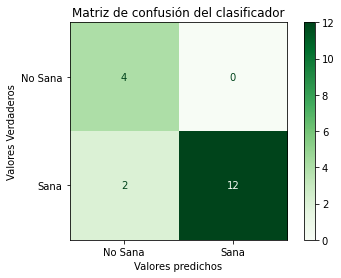

In [7]:
y_pred = model.predict(test_X)
y_pred.shape
test_Y_one_hot.shape
y_pred[0,:].sum()

a, mi_dicc = show_metrics(y_pred,.5)

#Crear tabla para latex

#print(pd.DataFrame(mi_dicc).to_latex(index=False))

## 5.3 Probar el modelo con una Hoja

In [8]:
#imgpath='Fotos/sana/augmented_49_622492.jpeg'
img=image.load_img("FotosCombinadas/Sana/augmented_35_3786006.jpeg",target_size=DEFAULT_IMAGE_SIZE)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images,batch_size=16)
print(pred)
if pred[0][0]>0.5:
    category="No Sana"
elif pred[0][1]>0.5:
    category="Sana"
    
print(category)

1/1 [==============================] - 0s 32ms/step
[[0. 1.]]
Sana


## 6. Prueba modelo dataset combinadas
Cargar modelo y valores del dataset original

In [9]:
model = tf.keras.models.load_model('modelo_combinadas.h5', compile=False)

test_X = np.load("test_X_originales.npy")
test_Y = np.load("test_Y_originales.npy")
test_Y_one_hot = np.load("test_Y_one_hot_originales.npy")

## 6.1 Análisis de métricas de rendimiento

In [10]:
opt = keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / epochs)
model.compile(loss=perd, optimizer=opt,metrics=['accuracy', f1_metric])

test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test accuracy:', test_eval[1])
print('Test F1:', test_eval[2])

1/1 [==============================] - 0s 329ms/step - loss: 0.0919 - accuracy: 1.0000 - f1_metric: 1.0000
Test accuracy: 1.0
Test F1: 1.0


## 6.2 Crear matriz de confusión

1/1 [==============================] - 0s 126ms/step


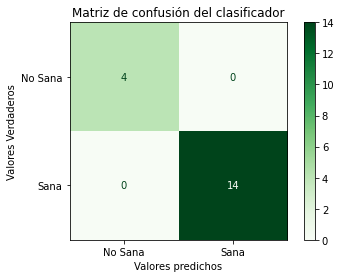

In [11]:
y_pred = model.predict(test_X)
y_pred.shape
test_Y_one_hot.shape
y_pred[0,:].sum()

a, mi_dicc = show_metrics(y_pred,.5)

## 6.3 Probar el modelo con una Hoja

In [12]:
#imgpath='Fotos/sana/augmented_49_622492.jpeg'
img=image.load_img("FotosCombinadas/Sana/augmented_35_3786006.jpeg",target_size=DEFAULT_IMAGE_SIZE)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images,batch_size=16)
print(pred)
if pred[0][0]>0.5:
    category="No Sana"
elif pred[0][1]>0.5:
    category="Sana"
    
print(category)

1/1 [==============================] - 0s 32ms/step
[[0. 1.]]
Sana


## 7. Prueba modelo dataset originales

In [13]:
model = tf.keras.models.load_model('modelo_originales.h5', compile=False)

test_X = np.load("test_X_originales.npy")
test_Y = np.load("test_Y_originales.npy")
test_Y_one_hot = np.load("test_Y_one_hot_originales.npy")

## 7.1 Análisis de métricas de rendimiento

In [14]:
opt = keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / epochs)
model.compile(loss=perd, optimizer=opt,metrics=['accuracy', f1_metric])

test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test accuracy:', test_eval[1])
print('Test F1:', test_eval[2])

1/1 [==============================] - 1s 626ms/step - loss: 0.2088 - accuracy: 0.9444 - f1_metric: 0.9444
Test accuracy: 0.9444444179534912
Test F1: 0.9444443583488464


## 7.2 Crear matriz de confusión

1/1 [==============================] - 0s 208ms/step


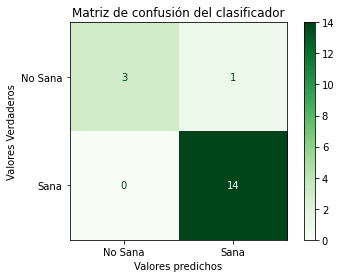

In [15]:
y_pred = model.predict(test_X)
y_pred.shape
test_Y_one_hot.shape
y_pred[0,:].sum()

a, mi_dicc = show_metrics(y_pred,.5)

## 7.3 Probar el modelo con una Hoja

In [16]:
#imgpath='Fotos/sana/augmented_49_622492.jpeg'
img=image.load_img("FotosCombinadas/Sana/augmented_35_3786006.jpeg",target_size=DEFAULT_IMAGE_SIZE)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images,batch_size=16)
print(pred)
if pred[0][0]>0.5:
    category="No Sana"
elif pred[0][1]>0.5:
    category="Sana"
    
print(category)

1/1 [==============================] - 0s 75ms/step
[[1. 0.]]
No Sana
